In [184]:
import chipcalibration.rpe_xyz as _rpe
from importlib import reload
import qubic.toolchain as tc
import qubic.rpc_client as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
import chipcalibration.config as _cfg
import qubic.job_manager as _jm
import chipcalibration.rabi_experiments as _rabi
from pyrpe.src.quapack.pyRPE.quantum import Q as RPE_Experiment
from pyrpe.src.quapack.pyRPE import RobustPhaseEstimation
import pygsti

In [185]:


#     def plot_rpe_verbose(self, dataset, num_shots, rpe_results):
#         # 1st process the dataset -- probably should design so that I don't have to process every time
#         fit = rpe_results
#         target_ds = self.simulate_target(num_shots)
#         self.target_ds = target_ds
#         target_fit = self.process_rpe(target_ds)
#         fig, axs = plt.subplots(3, 1)
#         axs[0].semilogx(self.max_depths, [dataset[c]['00'] for c in self.sin_circs.values()])
#         axs[0].semilogx(self.max_depths, [target_ds[c]['00'] for c in self.sin_circs.values()])
#         axs[0].set_title("00 counts on sin circuits")
#         axs[1].semilogx(self.max_depths, [dataset[c]['01'] for c in self.cos_circs.values()])
#         axs[1].plot(self.max_depths, [target_ds[c]['01'] for c in self.cos_circs.values()])
#         axs[1].set_title("01 counts on cos circuits")
#         axs[2].semilogx(self.max_depths, fit.angle_estimates)
#         axs[2].plot(self.max_depths, target_fit.angle_estimates, c='orange')
#         axs[2].plot((self.max_depths[0], self.max_depths[-1]), (np.pi / 2, np.pi / 2), c='red')
#         num_estimates = len(self.max_depths)
#         axs[2].fill_between(self.max_depths,
#                             [fit.angle_estimates[i] + 1 / (i + 1) for i in range(num_estimates)],
#                             [fit.angle_estimates[i] - 1 / (i + 1) for i in range(num_estimates)], color='blue')
#         axs[2].set_xlabel("Circuit depth")
#         plt.tight_layout()
#         plt.show()



In [186]:
qchipname = 'X4Y2'
fpga_config, qchip, channel_config = _cfg.load_configs(qchipname)
chanmap = {'Q0':7,'Q2':1,'Q1':4,'Q3':3,'Q4':5,'Q5':6,'Q6':2}

In [187]:
runner = rc.CircuitRunnerClient(ip='192.168.1.247')
jobman = _jm.JobManager(fpga_config, channel_config, runner, qchip)

In [188]:
target_qid = 'Q0'

In [189]:
# GMM Rabi 
gmm_rabi = _rabi.GMMRabi([target_qid], np.linspace(1.e-9, 50.e-9, 10), 
                       channel_configs=channel_config)

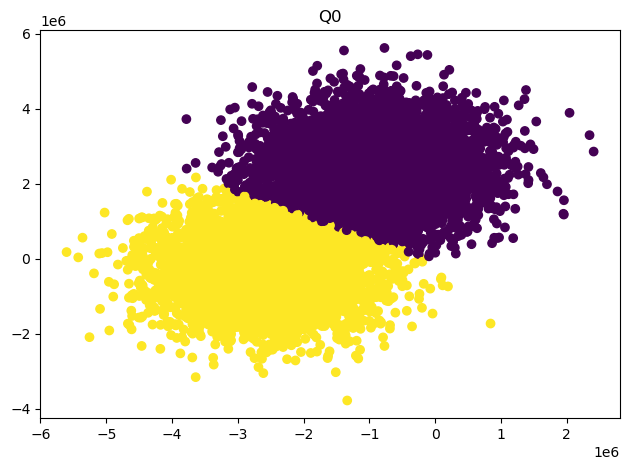

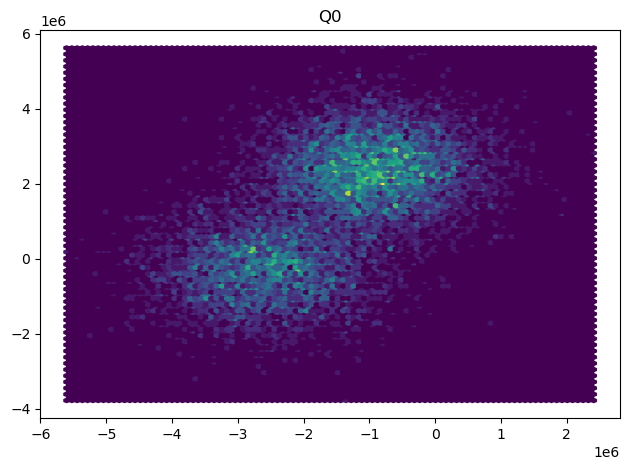

In [190]:
gmm_rabi.run_and_report(jobman, 1000, qchip)

In [191]:
jm = _jm.PyGSTiJobManager(fpga_config, channel_config, runner, qchip, gmm_rabi.gmm_manager)

In [192]:
reload(_rpe)
reload(_jm)

<module 'qubic.job_manager' from '/home/jpmarceaux/software/qubic/job_manager.py'>

In [193]:
default_amp = qchip.gates[f'{target_qid}X90'].cfg_dict[0]['amp']
default_twidth = qchip.gates[f'{target_qid}X90'].cfg_dict[0]['twidth']
default_freq = qchip.qubits[target_qid].freq

In [194]:
calibration = {
    'amp': default_amp, 
    'twidth' : default_twidth, 
    'freq' : default_freq
}
max_max_depth = 10
exp = _rpe.RPE_XYZ_Experiment(target_qid, calibration, max_max_depth)
print(calibration)

{'amp': 0.11017049134924568, 'twidth': 2.4e-08, 'freq': 4461736318.073627}


In [195]:
exp.run(jm, 1000)

{'X': <pygsti.data.dataset.DataSet at 0x7fc8fc5311b0>,
 'Y': <pygsti.data.dataset.DataSet at 0x7fc8b30fc0a0>,
 'Z': <pygsti.data.dataset.DataSet at 0x7fc8d0bc7340>}

In [196]:
exp.calibration

{'amp': 0.11017049134924568, 'twidth': 2.4e-08, 'freq': 4461736318.073627}

In [197]:
exp.x_circuits[1]

{0: Circuit(Gxpi2:Q0Gxpi2:Q0@(Q0)),
 1: Circuit(Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0@(Q0)),
 2: Circuit(Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0@(Q0)),
 3: Circuit(Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0@(Q0)),
 4: Circuit(Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0@(Q0)),
 5: Circuit(Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0@(Q0)),
 6: Circuit(Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi

In [198]:
exp.x_instructions

{Circuit(Gxpi2:Q0@(Q0)): [{'name': 'delay', 't': 0.0004, 'qubit': ['Q0']},
  {'name': 'X90',
   'qubit': ['Q0'],
   'modi': {(0, 'twidth'): 2.4e-08},
   (0, 'amp'): 0.11017049134924568,
   (0, 'freq'): 4461736318.073627},
  {'name': 'read', 'qubit': ['Q0']}],
 Circuit(Gxpi2:Q0Gxpi2:Q0@(Q0)): [{'name': 'delay',
   't': 0.0004,
   'qubit': ['Q0']},
  {'name': 'X90',
   'qubit': ['Q0'],
   'modi': {(0, 'twidth'): 2.4e-08},
   (0, 'amp'): 0.11017049134924568,
   (0, 'freq'): 4461736318.073627},
  {'name': 'X90',
   'qubit': ['Q0'],
   'modi': {(0, 'twidth'): 2.4e-08},
   (0, 'amp'): 0.11017049134924568,
   (0, 'freq'): 4461736318.073627},
  {'name': 'read', 'qubit': ['Q0']}],
 Circuit(Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0Gxpi2:Q0@(Q0)): [{'name': 'delay',
   't': 0.0004,
   'qubit': ['Q0']},
  {'name': 'X90',
   'qubit': ['Q0'],
   'modi': {(0, 'twidth'): 2.4e-08},
   (0, 'amp'): 0.11017049134924568,
   (0, 'freq'): 4461736318.073627},
  {'name': 'X90',
   'qubit': ['Q0'],
   'modi': {(0, 'twidth'): 2.

In [199]:
reload(_rpe)

<module 'chipcalibration.rpe_xyz' from '/home/jpmarceaux/chipcalibration/chipcalibration/rpe_xyz.py'>

In [200]:
anz = _rpe.RPEAnalyzer(exp, 1000)

/home/jpmarceaux/pyGSTi/pygsti/layouts/evaltree.py:183: UserWarning: Created an evaluation tree that is inefficient: tree-size > 3 * #circuits !
This is likely due to the fact that the circuits being simulated do not have a
periodic structure. Consider using a different forward simulator (e.g. MapForwardSimulator).
  _warnings.warn(("Created an evaluation tree that is inefficient: tree-size > %d * #circuits !\n"


{0: Circuit(Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0@(Q0)),
 1: Circuit(Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0@(Q0)),
 2: Circuit(Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0@(Q0)),
 3: Circuit(Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0@(Q0)),
 4: Circuit(Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gxpi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gypi2:Q0Gxpi

[1.618376123193987, 1.618966795020943, 4.643852096595488] [9, 9, 5] 
 [1.5708353840878129, 1.5708705098518576, 1.5706481741001916] [9, 9, 9]


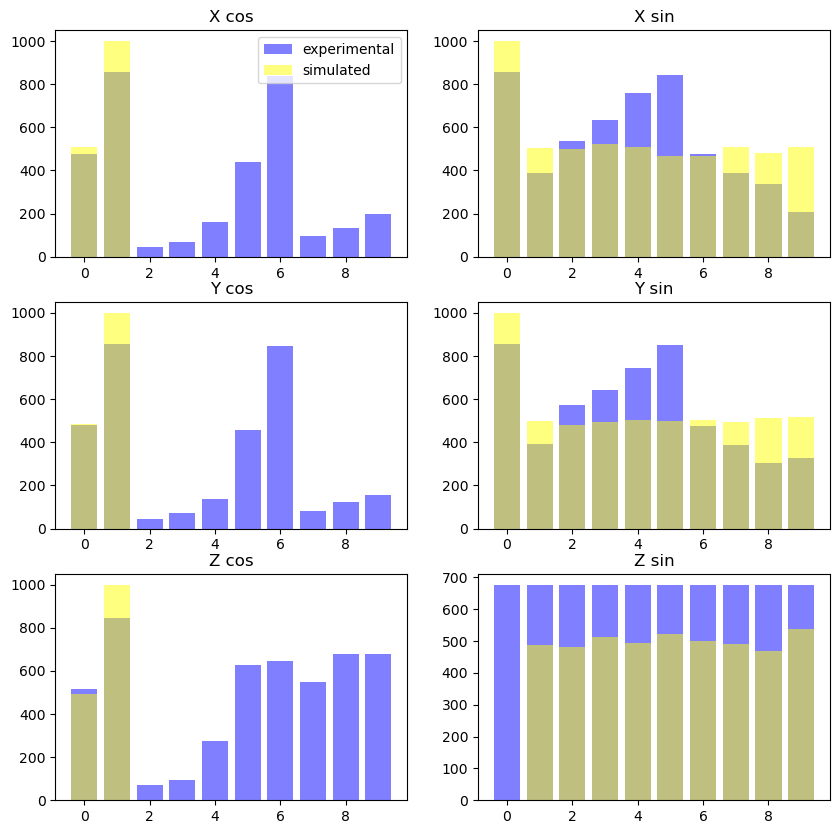

In [201]:
anz.plot_all_rpe()

# data collection

In [85]:
import pickle
from tqdm import tqdm

In [86]:
print(default_amp, default_freq)

0.11017049134924568 4461736318.073627


In [87]:
max_max_depth = 11

In [88]:
resolution = 10
amp_interval = np.linspace(min(default_amp-0.2, 0.05), default_amp+0.2, resolution)
freq_interval = np.linspace(default_freq-1e6, default_freq+1e6, resolution)

In [89]:
calibrations = [
    {'amp': amp_interval[idx1], 
    'twidth' : default_twidth, 
    'freq' : freq_interval[idx2]}
    for idx1 in range(resolution) for idx2 in range(resolution)
]

In [95]:
file=open('jun20_Q0',"wb")   

pickle.dump(experiments, file)

In [92]:
experiments = dict()
for c in tqdm(calibrations):
    experiments[(c['amp'], c['freq'])] =  _rpe.RPE_XYZ_Experiment(target_qid, c, max_max_depth)
    experiments[(c['amp'], c['freq'])].run(jm, 1000)
file=open('jun20_Q0',"wb")   
pickle.dump(experiments, file)

 91%|█████████████████████████████████████████████████████████▎     | 91/100 [1:11:32<07:04, 47.17s/it]


Fault: <Fault 1: "<class 'KeyboardInterrupt'>:">

In [30]:
first_exp = list(loaded_experiments.values())[0]

In [98]:
loaded_experiments = pickle.load( open( 'jun20_Q0', "rb" )) 


In [99]:
estimates = dict()
for k in loaded_experiments.keys():
    anz = RPEAnalyzer(loaded_experiments[k])
    e = anz.process_all_rpe()
    estimates[k] = e

[1.6206334707339034, 1.6199712151102497, 1.6458341113563613] 5
[6.282418316785644, 1.6200511762985517, 1.6601825909096308] 5
[6.282418316785644, 1.6203170935235942, 4.711900709068433] 4
[2.6684559332919084, 1.6207274387587822, 4.6977972066280405] 2
[1.3652640530999642, 1.6209501909943456, 4.6347294409510535] 1
[2.2298719431674963, 1.6209737095493117, 4.627498560624547] 2
[1.3072233550016916, 1.6203884736972631, 4.707399606277674] 1
[1.9819801679081057, 1.620457933299764, 4.69814791483987] 2
[2.068051490888428, 1.6204552771979728, 4.630950375646189] 2
[2.1406519765255383, 1.6201159736551447, 4.636377023810729] 2
[2.2444488688706286, 1.620684804253365, 1.6489972615565256] 2
[5.705040581074531, 1.6203809356027026, 4.625165185346004] 1
[2.1042124667056483, 1.6201604905747646, 1.5739895680953666] 2
[5.051066819009217, 1.620530839620841, 4.708582717367315] 2
[1.9966332915677893, 1.6203803355880084, 4.6436130354990395] 2
[2.099991734870055, 1.6204421156361988, 4.632930186889078] 2
[2.21054032

TypeError: 'NoneType' object is not subscriptable

In [35]:
colors = plt.cm.get_cmap('tab10')


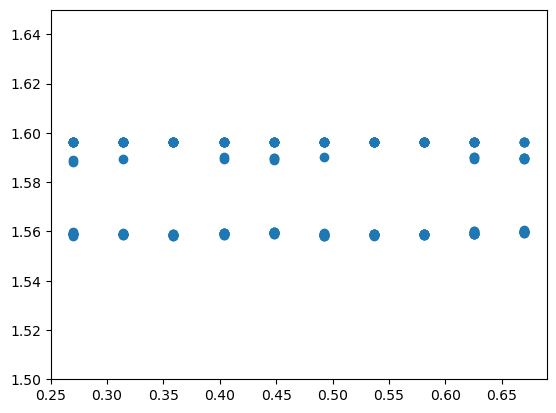

In [40]:

for a in amp_interval:
    for idx, f in enumerate(freq_interval):
        for k in range(3):
            plt.scatter(a, estimates[(a, f)][k], c=idx, cmap=colors, label=str(f))
            plt.ylim(1.5, 1.65)
    